<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>

<div style="text-align: center;">
    <img src="micromaster.png" width=170 alt="micromaster_logo">
    <br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=6>
    <b>Sharif Micromaster</b>
     <br>
<font color=0F5298 size=6>
   Programming For Data Analysis ~ Winter 2024
  <br>
<font color=606060 size=5>
    Assignment 4: Introduction to Pandas, Matplotlib, Seaborn 
</div>
</body>
</html>
<hr>

<div dir=ltr align=center>


<font size=5>
Solution Written by:
<a href="https://github.com/moeeinaali"><b>
Moeein Aali</b></a>
</div>

## Notebook Content
0. [Introduction](#Introduction)
1. [Importing Libraries](#importing-libraries)
2. [Loading Dataset](#loading-dataset)
3. [Basic Understanding of Dataset](#basic-understanding-of-dataset)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Feature Engineering](#feature-engineering)
6. [Data Pre-Processing](#data-pre-processing)

# Introduction
This project aims to perform data preparation and initial analysis on a real estate dataset. The dataset includes information about properties from both sales and rental listings, sourced from various sources. The goal is to gain insights into the characteristics of the real estate market and prepare the data for further analysis or modeling.

### **Project Steps**

1. Data Loading and Inspection
   - **Data Collection**: Real estate data is collected from multiple sources, including online listings and databases.
   - **Initial Inspection**: The structure and basic characteristics of the dataset are examined, including the number of records, columns, and data types.


2. Data Preprocessing
   - **Duplicate Data Removal**: Any duplicate records in the dataset are identified and removed to ensure data integrity.
   - **Data Type Identification**: The data types of columns are determined, and appropriate conversions are made if necessary.
   - **Missing Data Handling**: Missing values in the dataset are addressed through imputation or removal, depending on the context.
   - **Outlier Detection**: Outliers in the data, which may skew analysis results, are identified and processed using statistical methods.
   - **Feature Engineering**: New features are created based on existing ones to enhance the predictive power of the dataset.


3. Data Analysis and Exploration
   - **Correlation Analysis**: Relationships between different variables in the dataset are explored using correlation matrices and visualizations.
   - **Distribution Analysis**: The distribution of key variables, such as price and area, is examined to understand their patterns and characteristics.
   - **Visualization**: Various plots and charts are created to visualize the data and gain insights into underlying trends and patterns.


4. Data Modeling Preparation
   - **Feature Selection**: Relevant features for modeling are selected based on their importance and contribution to the target variable.
   - **Data Splitting**: The dataset is divided into training and testing sets to facilitate model training and evaluation.


5. Conclusion
   - This project serves as a foundational step in the analysis of real estate data. By preparing the dataset and performing initial exploratory analysis, it sets the stage for further analysis or modeling tasks. The insights gained from this project can be used by stakeholders in the real estate industry for decision-making and strategic planning.


### Importing Libraries


In [222]:
# TODO: Import Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Loading Dataset

In [223]:
# TODO: Load dataset.csv 
df = pd.read_csv('dataset.csv')

## Basic Understanding of Dataset

In [224]:
# TODO: Print Shape of our Dataset
df.shape

(3479, 8)

In [225]:
# TODO: Print Columns of Dataset
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [226]:
# TODO: Print first 5 rows of the dataset
df.head(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [227]:
# TODO: Print last 5 rows of the dataset
df.tail(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
3478,82,2,False,True,True,Parand,3.600000e+08,12000.00


In [228]:
# TODO: Number of Duplicated in our dataset
duplicated_count = df.duplicated().sum()
# TODO: The percentage of Duplicated in our dataset
dataSet_count = len(df)
print("The number of Duplicated Values:", duplicated_count)
print(f"The Percentage of Duplicats:", duplicated_count * 100 / dataSet_count)

The number of Duplicated Values: 208
The Percentage of Duplicats: 5.978729519977005


In [229]:
# TODO: Types of our Columns in Dataset
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

**Description**<br>

* Except Area feature , all of them have right type . we have to change its type later .<br>


In [230]:
# TODO: Print the number of missing values in our Dataset for each Column
missing_values_count = df.isnull().sum()
print("The Missing Values Count:", missing_values_count)
# TODO: The percentage of missing values in our Dataset for each Column
print("The percentage of missing values:")
print(missing_values_count * 100 / dataSet_count)

The Missing Values Count: Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64
The percentage of missing values:
Area          0.00000
Room          0.00000
Parking       0.00000
Warehouse     0.00000
Elevator      0.00000
Address       0.66111
Price         0.00000
Price(USD)    0.00000
dtype: float64


**Description**<br>

* Due to Address feature plays an important role and it must be exact, we can't replace missing values with anything.
* Consequently, we will drop those missing values later.

In [231]:
# TODO: Print the cardinality of our Columns
df.nunique()

Area          243
Room            6
Parking         2
Warehouse       2
Elevator        2
Address       192
Price         934
Price(USD)    932
dtype: int64

## Exploratory Data Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

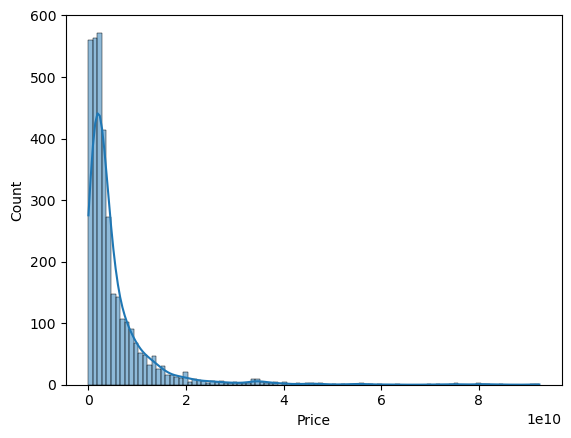

In [232]:
# TODO: Plot the distribution of prices from the dataset using a histogram with kernel density estimation enabled, specifying a palette and setting the number of bins to 100.
sns.histplot(x=df['Price'], kde=True, bins=100)

**Description**<br>

* Most houses have roughly close price in one third of the first part
* Outliers are obvious now(on the right side)

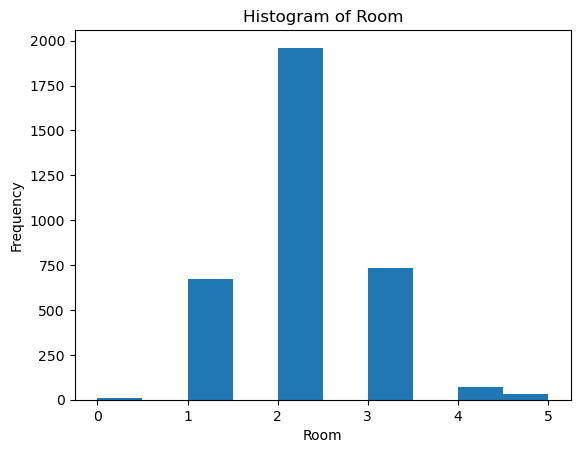

In [233]:
# TODO: Visualize the distribution of the number of rooms (Room) from the dataset using a histogram.
plt.hist(df['Room'])
plt.xlabel('Room')
plt.ylabel('Frequency')
plt.title('Histogram of Room')
plt.show()

**Description**<br>

* About 2000 houses have exactly 2 rooms (most houses) 
* Distribution of 1 and 3 rooms are roughly the same (a little more 3 rooms)
* we have not many houses with 4 or 5 rooms (in total about 150 houses)
* houses without room is rarely seen 

**Conclusion**
* Mean of rooms is roughly 2.

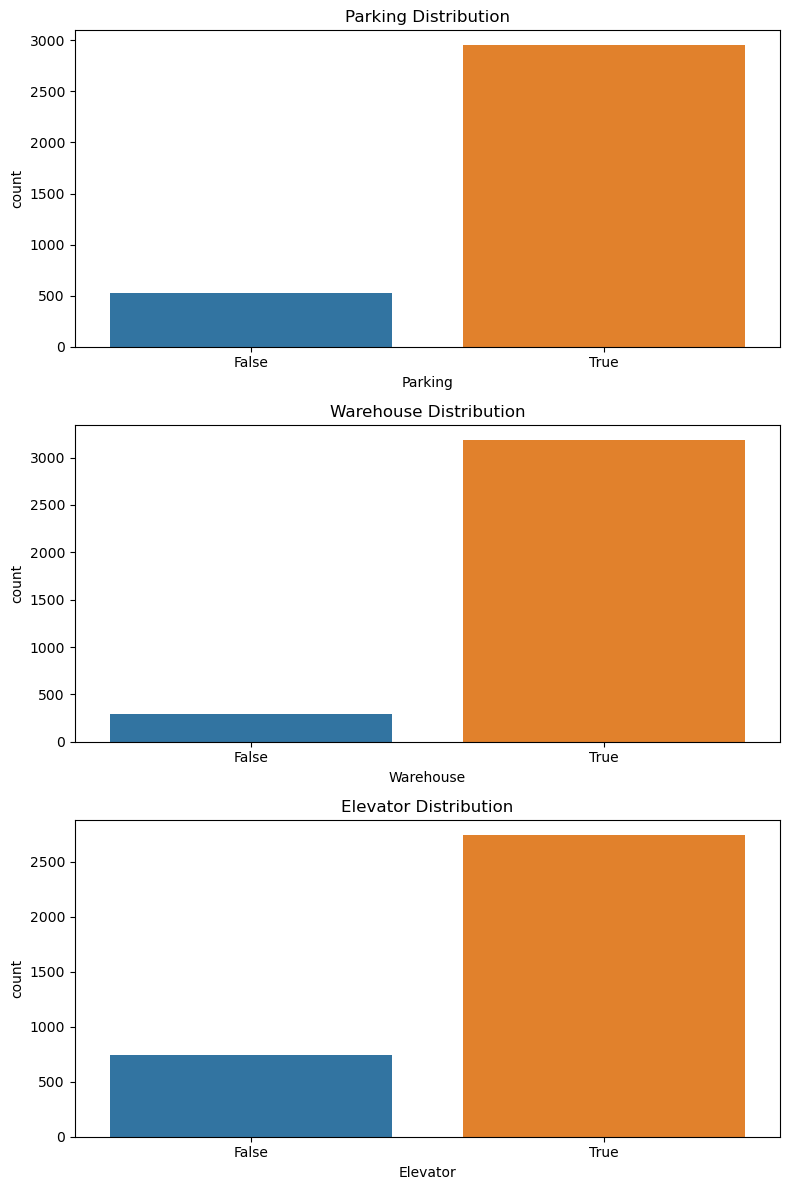

In [234]:
# TODO: Create subplots to visualize the distribution of boolean columns ('Parking', 'Warehouse', 'Elevator') from the dataset using countplots.
plt.figure(figsize=(8, 12))
for index, column_name in enumerate(['Parking', 'Warehouse', 'Elevator']):
    plt.subplot(3, 1, index + 1)
    sns.countplot(x=column_name, data=df)
    plt.title(f'{column_name} Distribution')
    plt.tight_layout()

**Description**<br>

* Most houses have Parking , Warehouse and Elevator (all these three features )
* Most houses have Warehouse.(houses without warehouse are very low)
* Those houses without Parking and Elevator have the same distribution(less than 1000 more than 500)


## Feature Engineering

In [235]:
# TODO: Display the data types of columns in the dataset.
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

**Description**<br>

The type of Area must be changed if we want to show and do feature engineering .<br>

To be possible to change its type we need to remove comma between numbers than we are capable changing its type.


In [236]:
# TODO: Remove commas from the 'Area' column and convert it to numeric data type.
df["Area"] = df["Area"].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"])

In [237]:
# TODO: Generate descriptive statistics for the 'Area' column in the dataset.
df['Area'].describe()

count    3.479000e+03
mean     8.744000e+06
std      3.167266e+08
min      3.000000e+01
25%      6.900000e+01
50%      9.000000e+01
75%      1.200000e+02
max      1.616000e+10
Name: Area, dtype: float64

**Description**<br>

We are going to divide Area feature to 4 category : Small(0-30) - AveUnderMean(30-90) - AveUpperMean(90-120)- High(120-...)

except these features other will be replaced to nan values

In [238]:
# TODO: Create a new feature 'AreaSize' based on the 'Area' column values, categorizing them as 'Small', 'AveUnderMean', 'AveUpperMean', or 'High'.
AreaSize = []
for i in df['Area']:
    if i <= 30:
        AreaSize.append("Small")

    elif 30 < i <= 90:
        AreaSize.append("AveUnderMean")

    elif 90 < i <= 120:
        AreaSize.append("AveUpperMean")

    elif i > 120:
        AreaSize.append("High")
    else:
        AreaSize.append(np.nan)

df["AreaSize"] = AreaSize

Text(0.5, 1.0, 'Area Distribution')

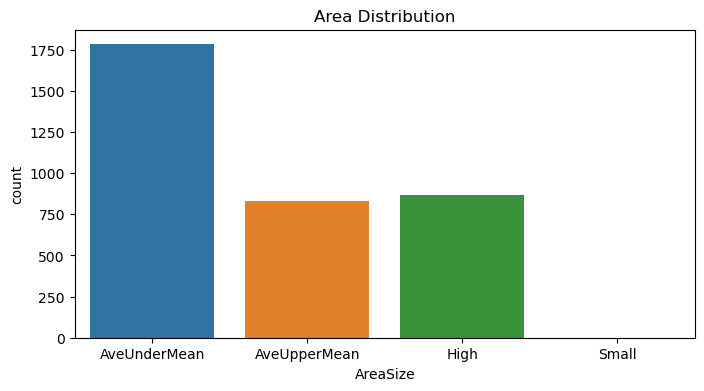

In [239]:
# TODO: Visualize the distribution of the 'AreaSize' feature using a count-plot.
plt.figure(figsize=(8, 4))
sns.countplot(x="AreaSize", data=df)
plt.title("Area Distribution")

**Description**<br>

* As we can see  about half of houses have between 30-90 meters(m2)
* Houses with 90-120 meters  have the same contribution with houses which have more than 120 meters
* we can realize that right-skewed has happened.(outliers most are on the right part)
* very low houeses are with less than 30 meters size.


We are going to determine 4 level for Price feature : Cheap , AveUnderMean , AveUpperMean , Expensive <br>

- `cheap` : 0-25% 
- `AveUnderMean` : 25%-50%
- `AveUpperMean` : 50%-75%
- `Expensive` : upper 75%

In [264]:
# TODO: Create a new feature 'PriceLevel' based on the 'Price' column values, categorizing them as 'Cheap', 'AveUnderMean', 'AveUpperMean', or 'Expensive'.
PriceLevel = []

H25 = df['Price'].describe()[4]
H50 = df['Price'].describe()[5]
H75 = df['Price'].describe()[6]

for i in df['Price']:

    if i <= H25:
        PriceLevel.append("Cheap")

    elif H25 < i <= H50:
        PriceLevel.append("AveUnderMean")

    elif H50 < i <= H75:
        PriceLevel.append("AveUpperMean")

    elif i > H75:
        PriceLevel.append("Expensive")

    else:
        PriceLevel.append(np.nan)

df["PriceLevel"] = PriceLevel
df

C:\Users\moeei\AppData\Local\Temp\ipykernel_9244\2288967117.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  H25 = df['Price'].describe()[4]
C:\Users\moeei\AppData\Local\Temp\ipykernel_9244\2288967117.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  H50 = df['Price'].describe()[5]
C:\Users\moeei\AppData\Local\Temp\ipykernel_9244\2288967117.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  H75 = df['Price'].describe()[6]


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67,AveUnderMean,AveUnderMean
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67,AveUnderMean,AveUnderMean
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33,AveUnderMean,Cheap
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,AveUpperMean,Cheap
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,High,Expensive
...,...,...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67,AveUnderMean,AveUpperMean
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67,AveUnderMean,Expensive
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67,AveUnderMean,Cheap
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67,AveUpperMean,AveUpperMean


Text(0.5, 1.0, 'Price Distribution')

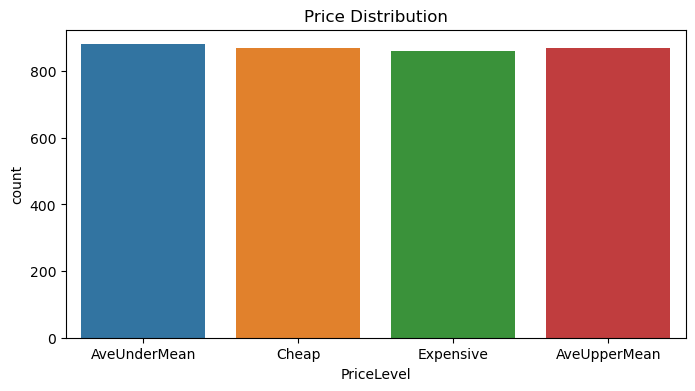

In [265]:
# TODO: Visualize the distribution of the 'PriceLevel' feature using a countplot.
plt.figure(figsize=(8, 4))
sns.countplot(x="PriceLevel", data=df)
plt.title("Price Distribution")

**Description**<br>

We have very balanced distribution in 4 parts

## Data Pre-Processing

In [267]:
# TODO: Display a random sample of 10 rows from the dataset.
df.sample(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
1890,123,3,True,True,True,Gheitarieh,7.400000e+09,246666.67,High,Expensive
2219,37,1,False,True,True,Ostad Moein,9.990000e+08,33300.00,AveUnderMean,Cheap
1077,121,3,True,True,True,Pardis,6.100000e+08,20333.33,High,Cheap
640,61,1,True,True,False,Central Janatabad,2.180000e+09,72666.67,AveUnderMean,AveUnderMean
1409,120,2,True,True,True,Saadat Abad,7.300000e+09,243333.33,AveUpperMean,Expensive
439,75,2,True,True,False,Shahr-e-Ziba,1.890000e+09,63000.00,AveUnderMean,AveUnderMean
2270,113,2,True,True,True,Niavaran,9.000000e+09,300000.00,AveUpperMean,Expensive
2502,250,4,True,True,True,Zaferanieh,1.875000e+10,625000.00,High,Expensive
1365,149,3,True,True,True,West Ferdows Boulevard,8.642000e+09,288066.67,High,Expensive
388,75,2,True,True,False,Shahr-e-Ziba,1.890000e+09,63000.00,AveUnderMean,AveUnderMean


In [277]:
# TODO: Calculate the number and percentage of missing values for each column in the dataset and display the results. Highlight the column with the maximum percentage of missing values in red.

missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_info = pd.concat([missing_values, missing_percentages], axis=1)
missing_info.columns = ['Missing Values', 'Percentage']
missing_info = missing_info.sort_values(by='Percentage', ascending=False)
print("Missing Values and Percentages:")
print(missing_info)

Missing Values and Percentages:
            Missing Values  Percentage
Address                 23     0.66111
Area                     0     0.00000
Room                     0     0.00000
Parking                  0     0.00000
Warehouse                0     0.00000
Elevator                 0     0.00000
Price                    0     0.00000
Price(USD)               0     0.00000
AreaSize                 0     0.00000
PriceLevel               0     0.00000


    
**Description**<br>

Address (location of house) is crucial , wa cant replace missing values with like(most frequent)
(if we do that our model doesnt have good prediction) <br>
So , we easily drop those missing values

In [283]:
# TODO: Remove rows with missing values from the dataset.
df.dropna(inplace=True)

In [284]:
# TODO: Confirm that there are no missing values remaining in the dataset after removing them.
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
AreaSize      0
PriceLevel    0
dtype: int64

In [285]:
# TODO: Identify and count duplicated values in the dataset. Calculate and print the percentage of duplicated values.
duplicated_values = df[df.duplicated()]
print(f'The Number of Duplicated values : {len(duplicated_values)}')
print(f'The Percentage of Duplicated values : {round(len(duplicated_values) / len(df) * 100)}%')

The Number of Duplicated values : 208
The Percentage of Duplicated values : 6%


**Description**<br>

We have 208 duplicated values .
We can easily drop them

In [286]:
# TODO: Remove duplicated rows from the dataset, reset the index, and drop the old index column.
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [287]:
# TODO: Print the new shape of the dataset after removing duplicated rows and resetting the index.
df.shape

(3248, 10)

In [288]:
# TODO: Display the data types of columns in the dataset after any transformations or modifications.
df.dtypes

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
AreaSize       object
PriceLevel     object
dtype: object

**Description**<br>
* About dtypes every thing is fine . <br>
* We are going to check and discover each feature .

In [324]:
# TODO: Calculate the count and mean price for each category of the 'AreaSize' feature and display the results, sorted by 'AreaSize' in descending order.
AreaSize_feature = df["AreaSize"].value_counts().to_frame()
AreaSize_feature["AreaSizeMean"] = df.groupby('AreaSize')["Price"].mean()
AreaSize_feature.sort_values('AreaSize', ascending=False)

,count,AreaSizeMean
AreaSize,,
Small,1,5.000000e+08
High,823,1.356967e+10
AveUpperMean,780,4.218686e+09
AveUnderMean,1644,2.027991e+09


**Description**<br>

* Obviously with increasing the meter of a house the price will raise and Mean will be raised too . <br>

* Distribution of houses according to Meter is : AveUnderMean - High - AveUpperMean - Small 

* There is just a house with a small size.(it's an outlier)

In [326]:
# TODO: Calculate the percentage distribution and mean price for each category of the 'Room' feature and display the results, sorted by room number.
room_feature = (df["Room"].value_counts(normalize=True) * 100).to_frame()
room_feature["MeanPrice"] = df.groupby('Room')["Price"].mean()
room_feature.sort_index()
room_feature

,proportion,MeanPrice
Room,,
2,56.003695,3.363038e+09
3,21.366995,1.104311e+10
1,19.242611,1.717832e+09
4,2.093596,2.568122e+10
5,1.016010,3.373439e+10
0,0.277094,8.715556e+09


    
**Description**<br>

We can see the distribution of houses with :   <br>
In row 2 , 3 , 1 , 4 , 5   and 0 rooms have the highest distribution. <br>

Mean price for each has been shown. <br>
Obviously, with raising the number of rooms the cost will be increased.<br>
(Duplicate the cost for each 1 room  (except 4rooms to 5rooms)

In [322]:
# TODO: Calculate the count and mean price for each category of the 'Parking' feature and display the results.
Parking_feature = df["Parking"].value_counts()
Parking_feature["ParkingMean"] = df.groupby("Parking")["Price"].mean()
Parking_feature

Parking
True                                                        2745
False                                                        503
ParkingMean    Parking
False    1.745254e+09
True     6.16213...
Name: count, dtype: object

**Description**<br>

* As we can see , most houses have parking (about 5.5x versus those without parking)<br>

* Those houses with parking have higher costs.(about fourfold)(transparently Parking is an important feature for price) 

In [327]:
# TODO: Calculate the count and mean price for each category of the 'Warehouse' feature and display the results.
Warehouse_feature = df["Warehouse"].value_counts()
Warehouse_feature["WarehouseMean"] = df.groupby("Warehouse")["Price"].mean()
Warehouse_feature

Warehouse
True                                                          2969
False                                                          279
WarehouseMean    Warehouse
False    2.545552e+09
True     5.753...
Name: count, dtype: object

    
**Description**<br>

* Most houses have Warehouse (about 10x versus those without Warehouse)

* Houses with warehouse have higher costs . more than duoble

In [328]:
# TODO: Calculate the count and mean price for each category of the 'Elevator' feature and display the results.
Elevator_feature = df["Elevator"].value_counts()
Elevator_feature["ElevatorMean"] = df.groupby("Elevator")["Price"].mean()
Elevator_feature

Elevator
True                                                         2551
False                                                         697
ElevatorMean    Elevator
False    3.740239e+09
True     5.9529...
Name: count, dtype: object

**Description**<br>

* Most houses have Elevator (about 4x versus those without Elevator)

* Houses with Elevator have higher costs .about 1.5X 

* Versus Parking and Warehouse  , Elevator has less influence on price


In [311]:
# TODO: Create a cross-tabulation between the 'Parking' and 'Room' features in the dataset.
pd.crosstab(df["Parking"], df["Room"])

Room,0,1,2,3,4,5
Parking,,,,,,
False,7,233,233,24,1,5
True,2,392,1586,670,67,28


**Description**<br>

* Most houses with 1 room or more have Parking.
* With raising the number of rooms , houses with Parking have increasingly raised.



In [315]:
# TODO: Calculate the mean price for each combination of 'Parking' and 'Warehouse' features in the dataset and round the results.
df.groupby(["Warehouse", "Parking"])["Price"].mean()

Warehouse  Parking
False      False      2.488763e+09
           True       2.657319e+09
True       False      1.312709e+09
           True       6.286411e+09
Name: Price, dtype: float64

**Description**

* It can be seen that houses with Warehouse and without Parking have less cost versus those houses with Parking.
* If both features exist in a house , the cost of the house will be high.


In [314]:
# TODO: Calculate the mean price for each combination of 'Room' and 'Warehouse' features in the dataset and round the results.
df.groupby(["Warehouse", "Room"])["Price"].mean()

Warehouse  Room
False      0       1.912075e+10
           1       1.376320e+09
           2       1.811028e+09
           3       7.692475e+09
           4       3.673333e+09
           5       9.927857e+09
True       0       3.914000e+08
           1       1.784436e+09
           2       3.495459e+09
           3       1.114253e+10
           4       2.669697e+10
           5       4.014385e+10
Name: Price, dtype: float64

**Description**<br>
* Except houses without room , with increasing the number of Rooms and Warehouse existance the cost will be increasingly raised.


In [316]:
# TODO: Display the unique values of the 'Address' column in the dataset.
df["Address"].unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [319]:
# TODO: Calculate and print the number of unique values in the 'Address' column of the dataset.
df["Address"].nunique()

192

**Description**<br>

Because we dont know that all names of addresses  have correct writing or human mistake has happened or not, we are going to 
remove any probable  problem in case of existance.

In [246]:
# TODO: Remove non-alphabetic characters from the 'Address' column in the dataset and display the first five rows.
df["Address"] = df["Address"].apply(lambda x: re.sub('[^a-zA-Z]', '', x))
df["Address"].head()

In [330]:
# TODO: Calculate and print the number of unique values in the 'Address' column of the dataset after removing non-alphabetic characters.
df["Address"].nunique()

192

In [334]:
# TODO: Find and store the top 10 most frequently occurring values in the 'Address' column.
Address_most = df["Address"].value_counts().head(10)
Address_most

Address
Punak                     148
West Ferdows Boulevard    133
Gheitarieh                133
Shahran                   123
Pardis                    123
Saadat Abad               120
Parand                    119
Shahr-e-Ziba               91
Jeyhoon                    88
Southern Janatabad         86
Name: count, dtype: int64

Text(0, 0.5, 'Address')

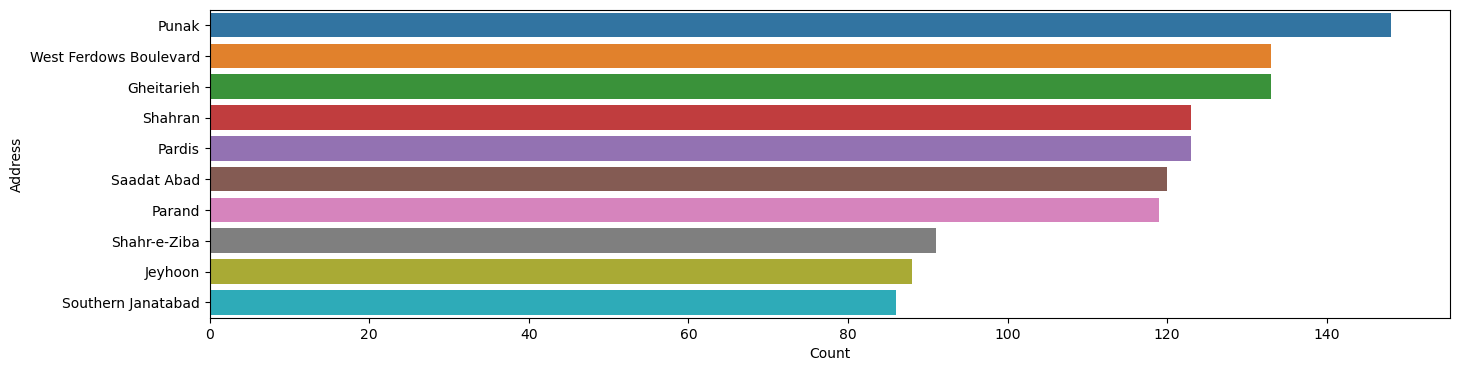

In [341]:
# TODO: Visualize the top 10 most frequently occurring values in the 'Address' column using a bar plot.
plt.figure(figsize=(16, 4))
sns.barplot(x=Address_most.values, y=Address_most.index)
plt.xlabel('Count')
plt.ylabel("Address")

In [348]:
# TODO: Calculate the mean price for each unique address in the dataset and store the results. Identify and store the top 10 addresses with the highest mean price.
Address_feature = df.groupby('Address')["Price"].mean().to_frame()
Address_Top_Ten_Expensive = Address_feature.sort_values("Price", ascending=False).head(10)
Address_Top_Ten_Expensive

,Price
Address,
Gandhi,7.000000e+10
Lavasan,4.800000e+10
Mahmoudieh,3.346667e+10
Vanak,3.270000e+10
Elahieh,2.678635e+10
Argentina,2.516500e+10
Zaferanieh,2.357515e+10
Velenjak,2.138136e+10
Farmanieh,2.066580e+10


In [349]:
# TODO: Calculate and round descriptive statistics for the 'Price' column in the dataset.
df["Price"].describe()

count    3.248000e+03
mean     5.478118e+09
std      8.267916e+09
min      3.600000e+06
25%      1.420000e+09
50%      2.977500e+09
75%      6.200000e+09
max      9.240000e+10
Name: Price, dtype: float64

In [354]:
# TODO: Create a copy of the dataset and format the 'Price' and 'Price(USD)' columns to display values with comma separators and no decimal places.
dataset_regular = df.copy()
dataset_regular["Price"] = dataset_regular["Price"].map('{:,.0f}'.format)
dataset_regular["Price(USD)"] = dataset_regular["Price(USD)"].map('{:,.0f}'.format)
dataset_regular

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
0,63,1,True,True,True,Shahran,"1,850,000,000","61,667",AveUnderMean,AveUnderMean
1,60,1,True,True,True,Shahran,"1,850,000,000","61,667",AveUnderMean,AveUnderMean
2,79,2,True,True,True,Pardis,"550,000,000","18,333",AveUnderMean,Cheap
3,95,2,True,True,True,Shahrake Qods,"902,500,000","30,083",AveUpperMean,Cheap
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000","233,333",High,Expensive
...,...,...,...,...,...,...,...,...,...,...
3243,63,1,True,True,False,Feiz Garden,"1,890,000,000","63,000",AveUnderMean,AveUnderMean
3244,86,2,True,True,True,Southern Janatabad,"3,500,000,000","116,667",AveUnderMean,AveUpperMean
3245,83,2,True,True,True,Niavaran,"6,800,000,000","226,667",AveUnderMean,Expensive
3246,105,2,True,True,True,Dorous,"5,600,000,000","186,667",AveUpperMean,AveUpperMean


**Description**<br>
* we create new variable to avoid changing the type of Price from numeric to object .
* Price and Price(USD) are easily readable now . 

<Axes: >

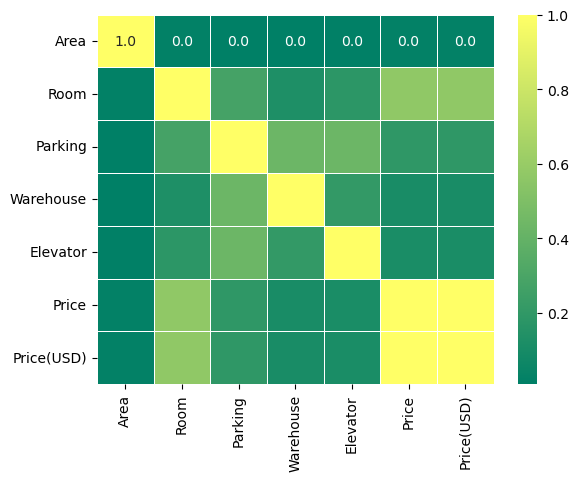

In [363]:
# TODO: Create a heatmap to visualize the correlation matrix of numerical columns in the dataset, including annotations, using the 'summer' colormap and setting the format of annotations to one decimal place.
numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="summer", fmt='.1f', linewidths=.5)

Text(0, 0.5, 'IQR')

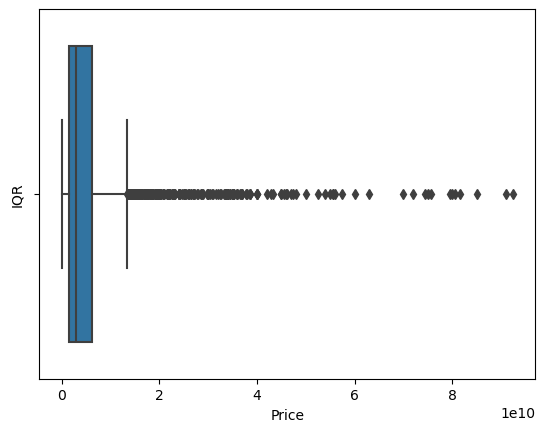

In [373]:
# TODO: Visualize the distribution of prices from the dataset using a boxplot.
sns.boxplot(x=df["Price"])
plt.ylabel("IQR")

In [386]:
# TODO: Calculate the skewness of each numerical column in the dataset.
df.skew

<bound method DataFrame.skew of       Area  Room  Parking  Warehouse  Elevator             Address  \
0       63     1     True       True      True             Shahran   
1       60     1     True       True      True             Shahran   
2       79     2     True       True      True              Pardis   
3       95     2     True       True      True       Shahrake Qods   
4      123     2     True       True      True      Shahrake Gharb   
...    ...   ...      ...        ...       ...                 ...   
3243    63     1     True       True     False         Feiz Garden   
3244    86     2     True       True      True  Southern Janatabad   
3245    83     2     True       True      True            Niavaran   
3246   105     2     True       True      True              Dorous   
3247    82     2    False       True      True              Parand   

             Price  Price(USD)      AreaSize    PriceLevel  
0     1.850000e+09    61666.67  AveUnderMean  AveUnderMean  
1    

**Description**<br>

What are outliers in dataset ?

Answer : Outliers are values at the extreme ends of a dataset.

One of the best method to find out outliers : **Interquartile range method** 

Interquartile range method:

1: Sort your data from low to high<br>
2: Identify the `first quartile` (Q1), the `median`, and the `third quartile` (Q3).<br>
3: Calculate your `IQR = Q3 – Q1`<br>
4: Calculate your upper fence = `Q3 + (1.5 * IQR)`<br>
5: Calculate your lower fence = `Q1 – (1.5 * IQR)`<br>
6: Use your fences to highlight any outliers, all values that fall outside your fences.<br>
7: Your outliers are any values **greater than your upper fence or less than your lower fence**.<br>


In [394]:
# TODO: Define a function named "Interquartile_Range" that calculates the interquartile range (IQR) and fences for outlier detection for a given dataframe and target column.
def Interquartile_Range(df, target):
    Q1 = np.percentile(df[target], 25)
    Q3 = np.percentile(df[target], 75)

    IQR = Q3 - Q1

    Upper_Fence = Q3 + (1.5 * IQR)
    Lower_Fence = Q1 - (1.5 * IQR)

    print(f'The Upper_Fence for {target} is : {Upper_Fence}')
    print(f'The Lower_Fence for {target} is : {Lower_Fence}')


In [395]:
# TODO: Use the "Interquartile_Range" function to calculate the interquartile range (IQR) and fences for the 'Price' and 'Area' columns in the dataset.
Interquartile_Range(df, target="Price")
print()
Interquartile_Range(df, target='Area')

The Upper_Fence for Price is : 13370000000.0
The Lower_Fence for Price is : -5750000000.0

The Upper_Fence for Area is : 200.0
The Lower_Fence for Area is : -8.0


**Description**<br>
* It must be considered that most outliers are on the right side dut to **Right_skewed** <br>
so , we need to remove outliers on the right(Upper_Fence)

* Among all the features , two of them have noticeable effect : **Area** and **Price** <br>
We cant find out outliers from  (Room , Parking , Warehouse ,Elevator) features.<br>
It's better to find out outliers first from Price , second Area

In [397]:
# TODO: Define upper fence values for the 'Price' and 'Area' columns. Identify and store the indices of data points exceeding these upper fences.
PriceUpperFence = 10 - 000 - 000 - 000
AreaUpperFence = 200
Price_UpperFence_Data = np.where(df["Price"] > PriceUpperFence)
Area_UpperFence_Data = np.where(df["Area"] > AreaUpperFence)

**Description**<br>

* We can use of a method and add all the Outliers which are greater than UpperFence for both Price and Area and then <br>
eliminate them from our Dataset(but in a new variable)

In [420]:
# TODO: Combine the indices of outliers identified for both 'Price' and 'Area' columns. Print the total number and percentage of outliers. Display the first five rows of the dataset for these outliers.
Price_Area_Outliers = np.union1d(Price_UpperFence_Data, Area_UpperFence_Data)
print(f'The length of Outliers is : {len(Price_Area_Outliers)} ')
print(f'The percentage of Outliers is : {round(len(Price_Area_Outliers) / len(df) * 100)}%')
dataset_regular.iloc[Price_Area_Outliers].head()

The length of Outliers is : 3248 
The percentage of Outliers is : 100%


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
0,63,1,True,True,True,Shahran,"1,850,000,000","61,667",AveUnderMean,AveUnderMean
1,60,1,True,True,True,Shahran,"1,850,000,000","61,667",AveUnderMean,AveUnderMean
2,79,2,True,True,True,Pardis,"550,000,000","18,333",AveUnderMean,Cheap
3,95,2,True,True,True,Shahrake Qods,"902,500,000","30,083",AveUpperMean,Cheap
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000","233,333",High,Expensive
